# Plotting with Pandas

In [148]:
import pandas as pd
reviews = pd.read_csv("/Users/Neeraj/Documents/Proj/Spark/data/wine-reviews/winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


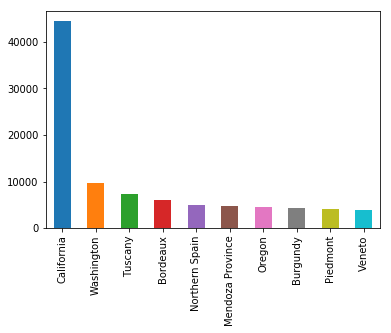

In [5]:
import matplotlib
%matplotlib inline

# total no. of wines produced by top 10 provinces.
reviews['province'].value_counts().head(10).plot.bar()

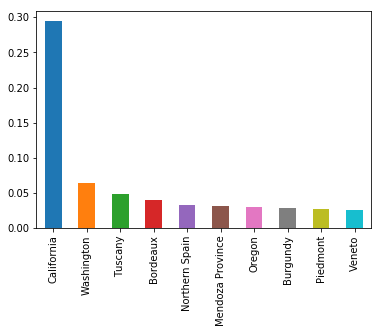

In [8]:
# Lets find the % of each province share
(reviews['province'].value_counts().head(10)/len(reviews)).plot.bar()

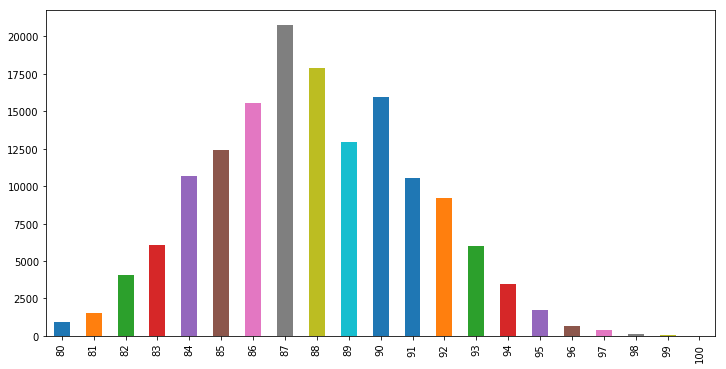

In [80]:
# plot score alloted by wine magazines
# figsize=(width,height) in inches
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12,6))


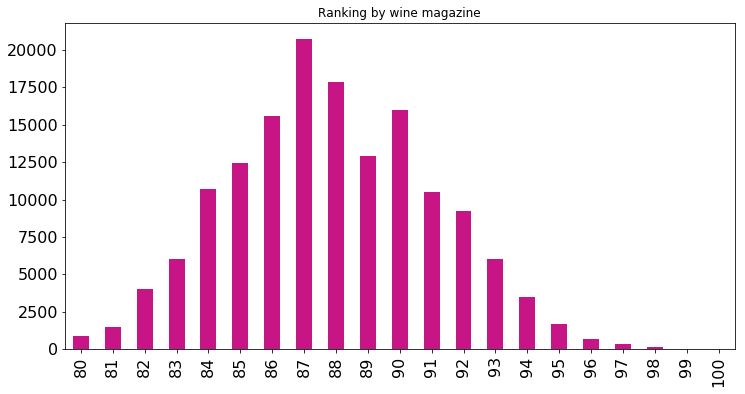

In [83]:
# change the color, font size and plot size, add a title
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='mediumvioletred',
    fontsize=16,
    title='Ranking by wine magazine'
)

Text(0.5, 1.0, 'Ranking given by wine magazine')

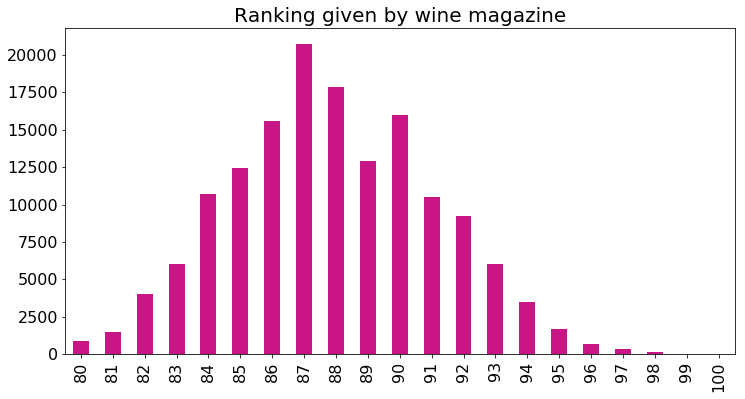

In [85]:
# increasing title size is not easy in pandas, but using matplotlib it can be done easily as;
import matplotlib.pyplot as plt
ax = reviews['points'].value_counts().sort_index().plot.bar(
        figsize = (12,6),
        color='mediumvioletred',
        fontsize= 16
    )

ax.set_title("Ranking given by wine magazine", fontsize=20)


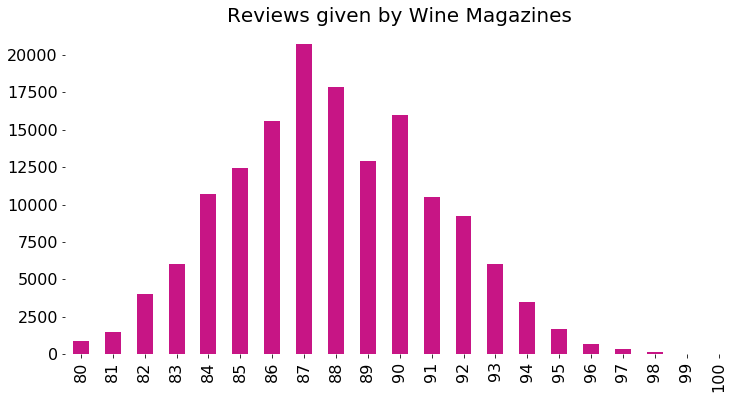

In [91]:
# turn off black border, you will need seaborn for it
import matplotlib.pyplot as plt
import seaborn as sns

ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Reviews given by Wine Magazines", fontsize=20)
sns.despine(bottom=True, left=True) # removes border

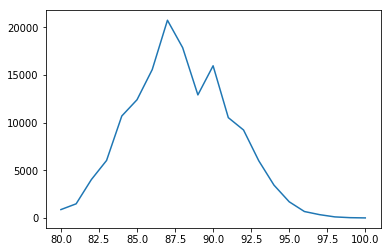

In [15]:
# if categories (x-axis) has too many values, than bar chart may not be ideal option.
# A line chart can pass over any number of many individual values, making it the tool of first choice for distributions 
# with many unique values or categories.
reviews['points'].value_counts().sort_index().plot.line()

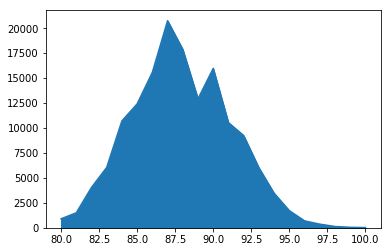

In [16]:
# area charts
reviews['points'].value_counts().sort_index().plot.area()

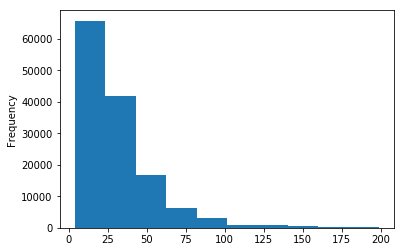

In [21]:
# plotting range or intervals using histograms
reviews[reviews['price'] < 200]['price'].plot.hist()

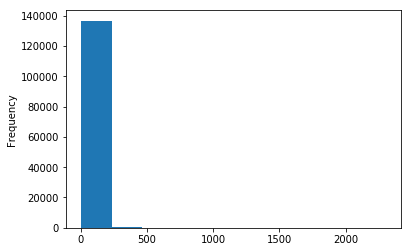

In [22]:
# histograms aren't good with skewed data. If you plot another data set
reviews['price'].plot.hist()

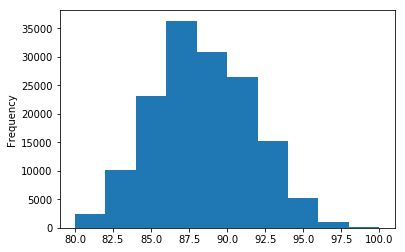

In [23]:
# but histograms work fine with data without skew
reviews['points'].plot.hist()

In [27]:
# Exercise
pd.set_option('max_columns', None)
pok = pd.read_csv("/Users/Neeraj/Documents/Proj/Spark/data/pokemon.csv")
pok.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


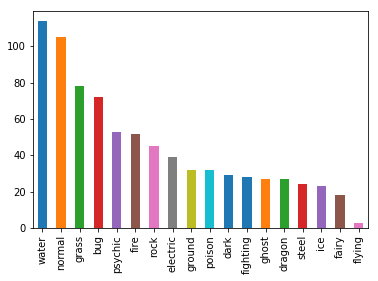

In [26]:
## Pokemon - The frequency of Pokemon by type

pok['type1'].value_counts().plot.bar()

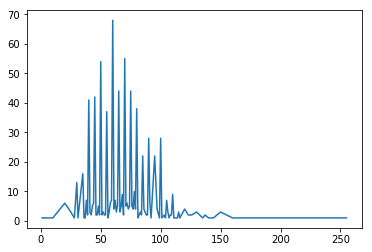

In [29]:
## The frequency of Pokemon by HP stat total
pok['hp'].value_counts().sort_index().plot.line()


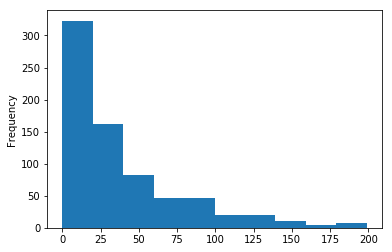

In [34]:
# The frequency of Pokemon by weight:
pok[pok['weight_kg']<200]['weight_kg'].plot.hist()

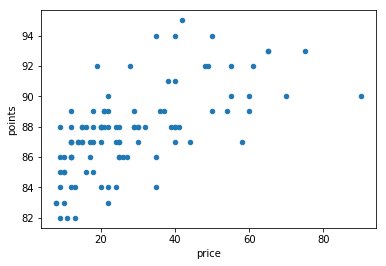

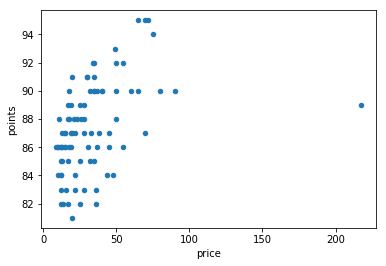

In [39]:
# scatter plot
reviews[reviews['price']<100].sample(100).plot.scatter(x='price', y='points')
reviews.sample(100).plot.scatter(x='price', y='points')

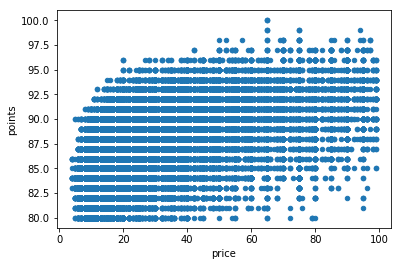

In [40]:
# taking a sample is important for scatter plot otherwise it may not mean much.
#Because of their weakness to overplotting, scatter plots work best with relatively 
# small datasets, and with variables which have a large number of unique values.
reviews[reviews['price']<100].plot.scatter(x='price', y='points')


The data in this plot is directly comparable with that in the scatter plot from earlier, but the story it tells us is very different. From this hexplot we can see that the bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around $20.

We did not see this effect by looking at the scatter plot, because too many similarly-priced, similarly-scoring wines were overplotted. By doing away with this problem, this hexplot presents us a much more useful view of the dataset.

Hexplots and scatter plots can by applied to combinations of interval variables and/or ordinal categorical variables.



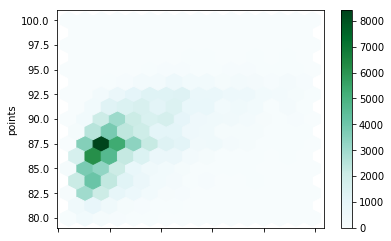

In [44]:
# Hexplot
# A hex plot aggregates points in space into hexagons, and then colors those hexagons based on the values within them

reviews[reviews['price']<100].plot.hexbin(x='price', y='points', gridsize=15)

print("""
The data in this plot is directly comparable with that in the scatter plot from earlier, but the story it tells us is very different. From this hexplot we can see that the bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around $20.

We did not see this effect by looking at the scatter plot, because too many similarly-priced, similarly-scoring wines were overplotted. By doing away with this problem, this hexplot presents us a much more useful view of the dataset.

Hexplots and scatter plots can by applied to combinations of interval variables and/or ordinal categorical variables.
""")

In [149]:
wine_counts = pd.read_csv("/Users/Neeraj/Documents/Proj/Spark/data/top-five-wine-score-counts.csv", index_col=0)
wine_counts.head(5)

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


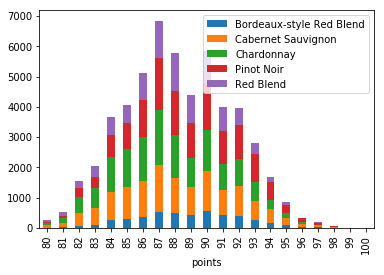

In [47]:
wine_counts.plot.bar(stacked=True)

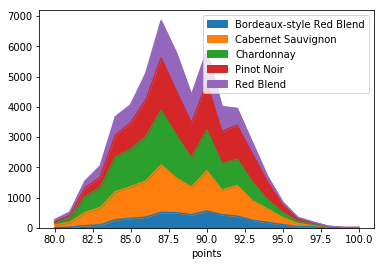

In [48]:
wine_counts.plot.area()

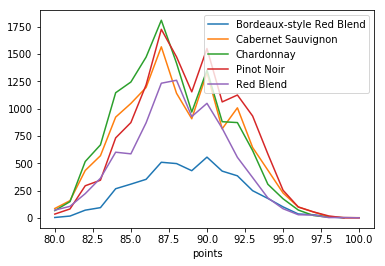

In [49]:
wine_counts.plot.line()

In [50]:
pok.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


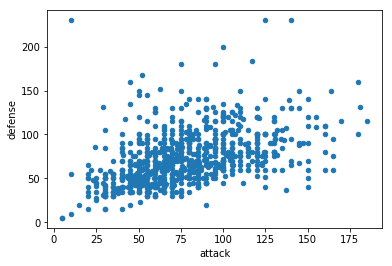

In [53]:
pok.plot.scatter(x='attack',y='defense')

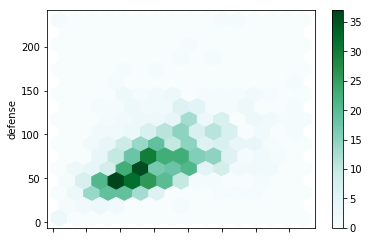

In [59]:
pok.plot.hexbin(x='attack',y='defense',gridsize=15)

In [64]:
pokemon_stats_legendary = pok.groupby(['is_legendary', 'generation']).mean()[['attack', 'defense']]
pokemon_stats_legendary.head(4)

attack    defense
is_legendary generation                      
0            1           73.486301  69.431507
             2           68.095745  70.042553
             3           74.080000  68.768000
             4           79.234043  72.382979

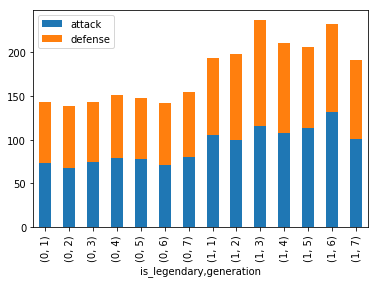

In [65]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [71]:
pokemon_stats_by_generation = pok.groupby('generation').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
pokemon_stats_by_generation.head(4)

,hp,attack,defense,sp_attack,sp_defense,speed
generation,,,,,,
1,64.344371,74.529801,70.079470,69.403974,67.741722,70.152318
2,70.980000,69.960000,71.790000,65.400000,73.440000,61.610000
3,65.666667,77.185185,72.637037,71.562963,69.392593,63.577778
4,73.102804,82.672897,76.168224,74.635514,74.523364,70.074766


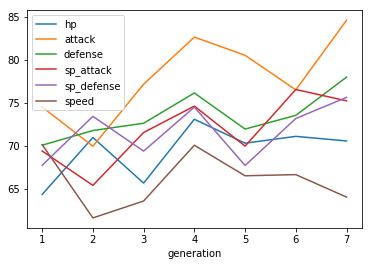

In [76]:
pokemon_stats_by_generation.plot.line()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x135c12940>,
      dtype=object)

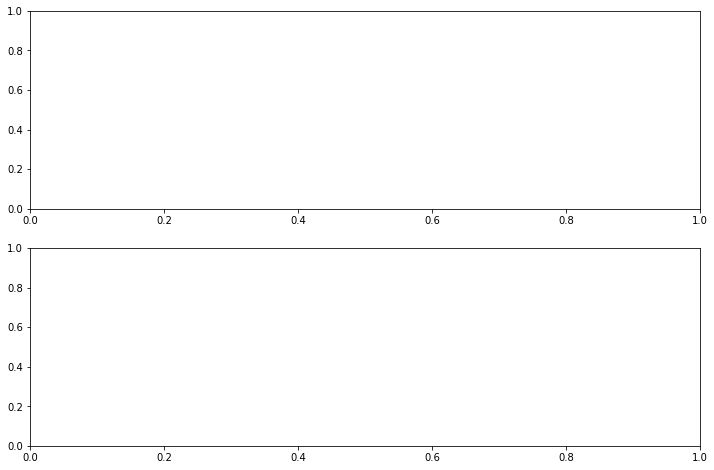

In [92]:
# subplots - Subplotting is a technique for creating multiple plots that live side-by-side in one overall figure. 
# We can use the subplots method to create a figure with multiple subplots. subplots takes two arguments. The first one controls the number of rows, 
# the second one the number of columns.

import pandas as pd
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2,1, figsize=(12,8))
fig
axarr

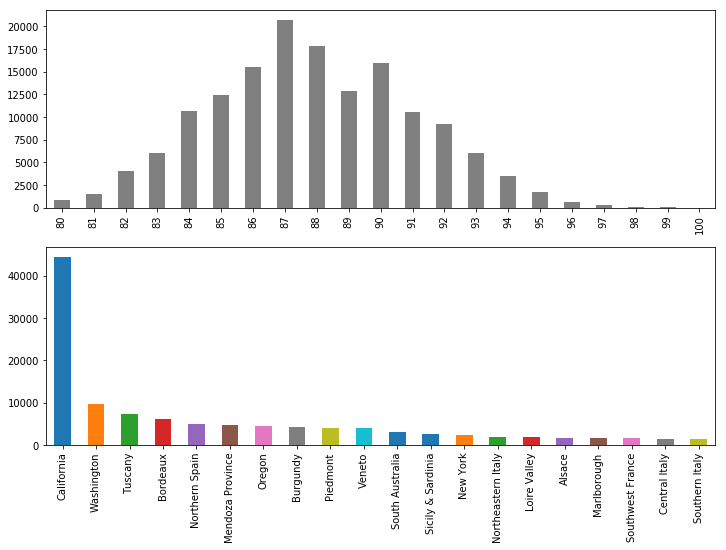

In [97]:
# now we can draw 2 plots together:
fig, axarr = plt.subplots(2,1, figsize=(12,8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0],
    color="grey"
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

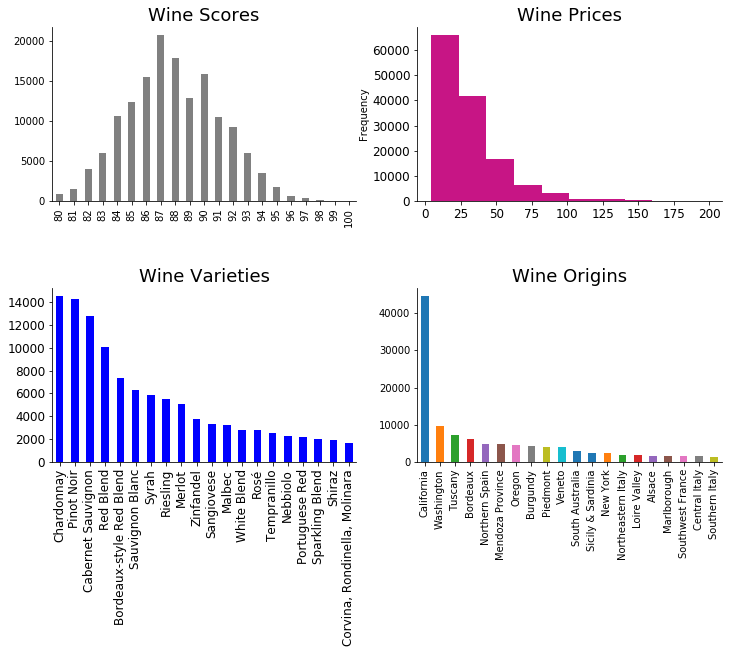

In [109]:
fig,axarr = plt.subplots(2,2,figsize=(12,8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0],
    color="grey"
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews[reviews['price'] < 200]['price'].plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)


reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='blue'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

plt.subplots_adjust(hspace=.5)
import seaborn as sns
sns.despine()


# Using seaborn
seaborn is a standalone data visualization package that provides many extremely valuable data visualizations in a single package. It is generally a much more powerful tool than pandas

In [110]:
# lets get the data first
import pandas as pd
reviews = pd.read_csv("/Users/Neeraj/Documents/Proj/Spark/data/wine-reviews/winemag-data_first150k.csv", index_col=0)
reviews.head(4)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi


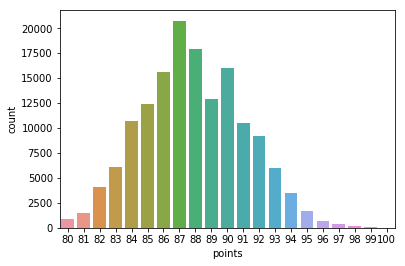

In [111]:
# now get seaborn module
import seaborn as sns
sns.countplot(reviews['points'])

# Comparing this chart with the bar chart above, we find that, unlike pandas, seaborn doesn't 
# require us to shape the data for it via value_counts; the countplot (true to its name) aggregates the data for us
# for each category

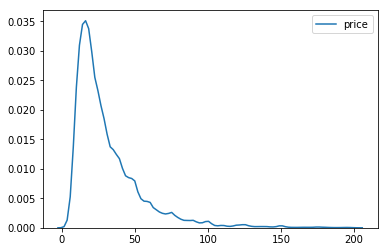

In [112]:
# kde plot
sns.kdeplot(reviews.query('price < 200').price)

# KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. 
# It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" 
# values which would cause a line chart to suddenly dip.
# A KDE plot is better than a line chart for getting the "true shape" of interval data. 
# In fact, I recommend always using it instead of a line chart for such data.

# However, it's a worse choice for ordinal categorical data. A KDE plot expects that if there are 200 wine 
# rated 85 and 400 rated 86, then the values in between, like 85.5, should smooth out to somewhere in between 
# (say, 300). However, if the value in between can't occur (wine ratings of 85.5 are not allowed), then the KDE plot 
# is fitting to something that doesn't exist. In these cases, use a line chart instead.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


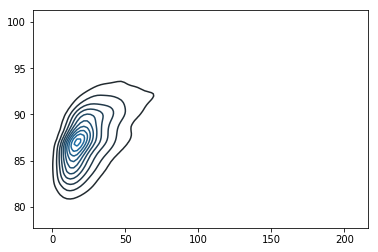

In [113]:
# 2D KDE plots
sns.kdeplot(reviews[reviews['price']<200].loc[:,['price','points']].dropna().sample(5000))

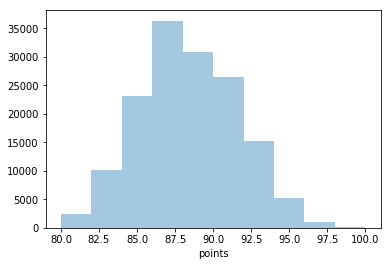

In [116]:
# seaborn distplot() - equivalent of pandas hist()

sns.distplot(reviews['points'],bins=10, kde=False)

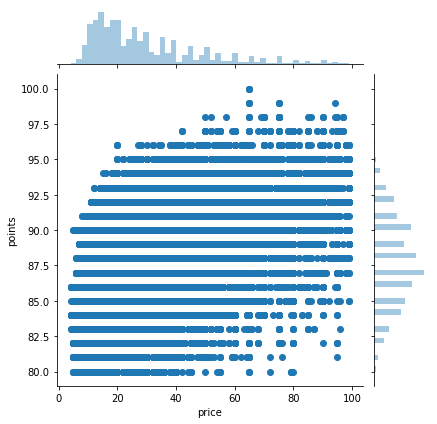

In [119]:
# joint plot
sns.jointplot(x='price',y='points',data=reviews[reviews['price'] < 100])

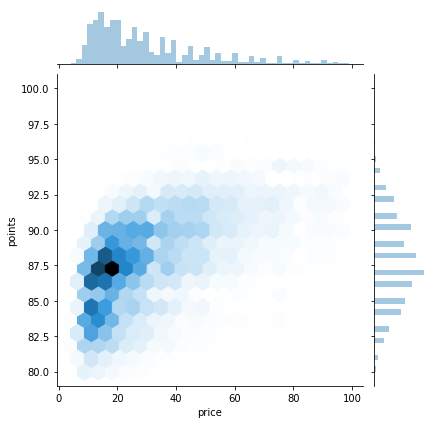

In [120]:
# hex plot
sns.jointplot(x='price', y='points',data=reviews[reviews['price']<100], kind='hex', gridsize=20)

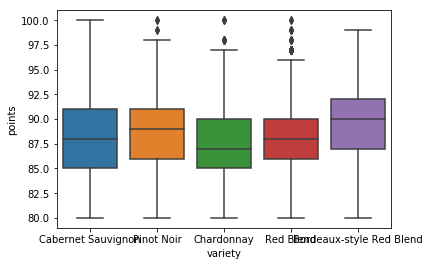

In [122]:
# boxplot

# The center of the distributions shown above is the "box" in boxplot. The top of the box is the 75th percentile, 
# while the bottom is the 25th percentile. In other words, half of the data is distributed within the box! 
# The green line in the middle is the median.

# The other part of the plot, the "whiskers", shows the extent of the points beyond the center of the distribution. 
# Individual circles beyond that are outliers.

df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]
sns.boxplot(x='variety', y='points', data=df)

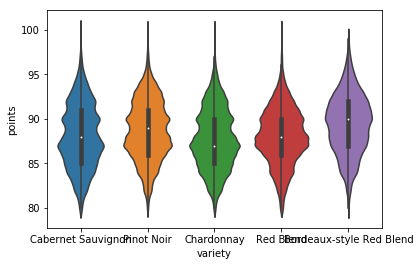

In [124]:
# violin plot
sns.violinplot(x='variety', y='points', data=df)

# A violinplot cleverly replaces the box in the boxplot with a kernel density estimate for the data. 
# It shows basically the same data, but is harder to misinterpret and much prettier than the utilitarian boxplot.

# Faceting with seaborn

In [150]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("/Users/Neeraj/Documents/Proj/Spark/data/CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])
footballers.head(5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


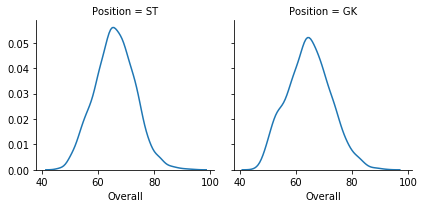

In [131]:
import seaborn as sns
df = footballers[footballers['Position'].isin(['ST','GK'])]
g = sns.FacetGrid(df, col='Position')
g.map(sns.kdeplot,"Overall")

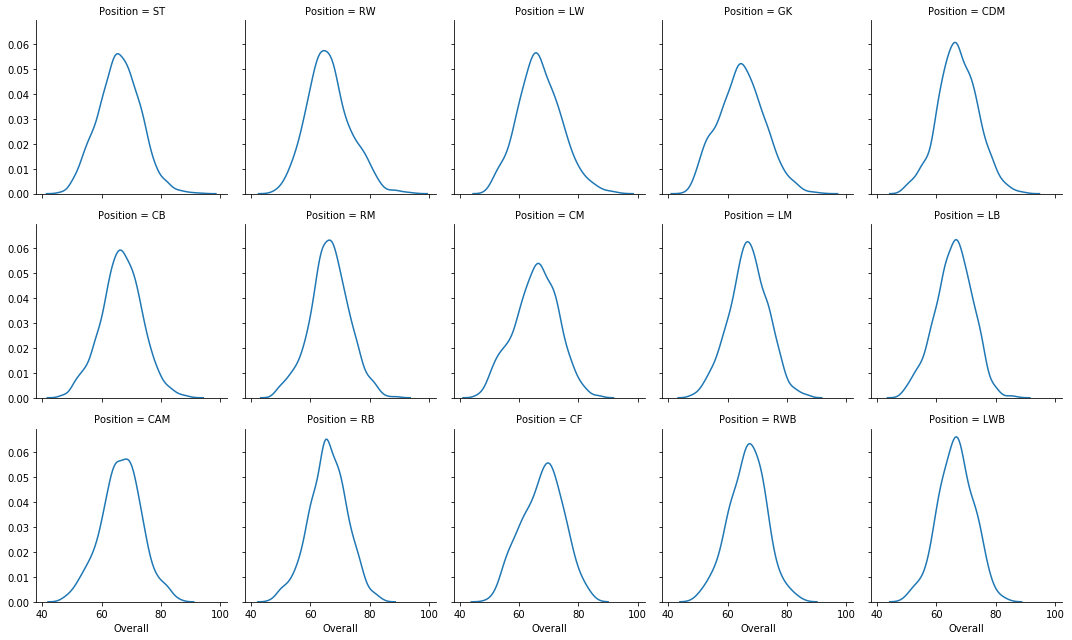

In [133]:
df = footballers

g = sns.FacetGrid(df, col='Position',col_wrap=5)
g.map(sns.kdeplot,"Overall")

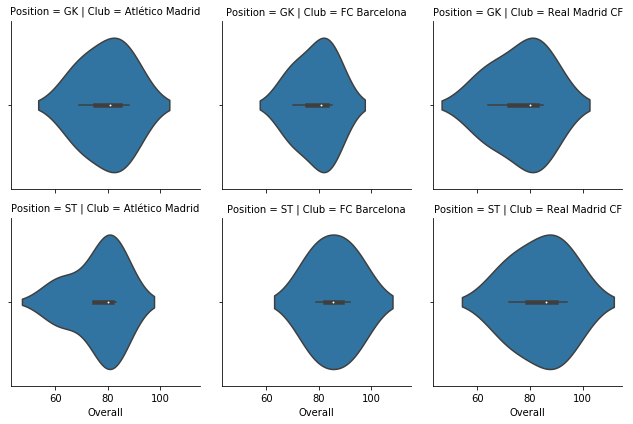

In [135]:
# multi dimensional
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club", 
                  row_order=['GK', 'ST'],
                  col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF'])

g.map(sns.violinplot, "Overall")

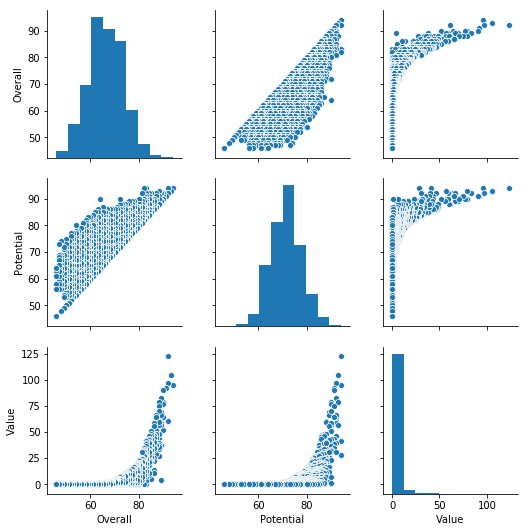

In [140]:
# pair plot
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])

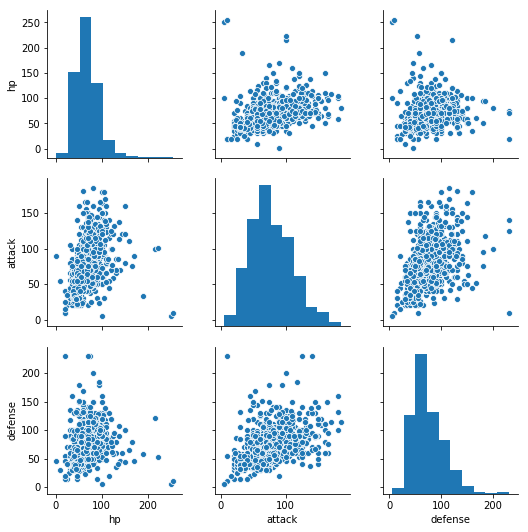

In [143]:
sns.pairplot(pok[['hp', 'attack', 'defense']])

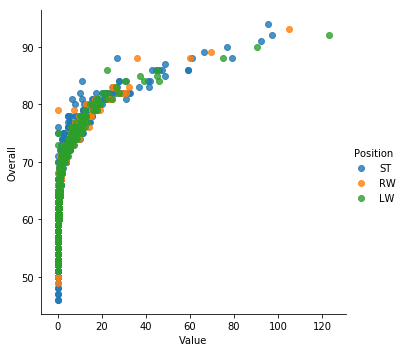

In [145]:
# multi variate data plots
import seaborn as sns
sns.lmplot(x='Value', y='Overall', hue='Position',
          data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False
          )

# This scatterplot uses three visual variables. The horizontal position (x-value) tracks the Value of the player 
# (how well they are paid). The vertical position (y-value) tracks the Overall score of the player across all 
# attributes. And the color (the hue parameter) tracks which of the three categories of interest the player 
# the point represents is in.

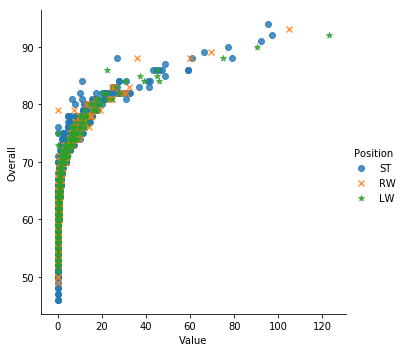

In [146]:
# use markers to handle overplotting issues
sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position',
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False
          )

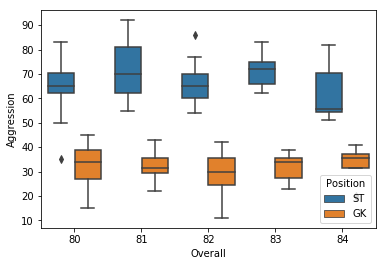

In [147]:
# do Strikers score higher on "Aggression" than Goalkeepers do?
f = (footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

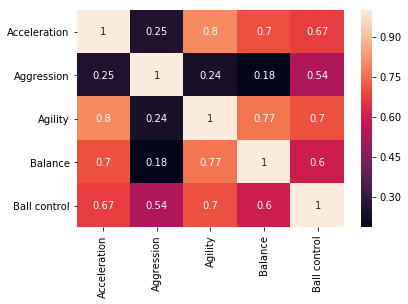

In [151]:
# Heatmap
# Probably the most heavily used summarization visualization is the correlation plot, which measures 
# the correlation between every pair of values in a dataset and plots a result in color.

f = ( 
    footballers.loc[:,['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
    .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
    .dropna()
).corr()

sns.heatmap(f, annot=True)

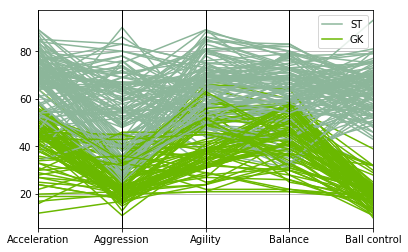

In [153]:
# Parallel coordinates

# Parallel coordinates plots are great for determining how distinguishable different classes are in the data. 
# They standardize the variables from top to bottom... In this case, we see that strikers are almost uniformally 
# higher rated on all of the variables we've chosen, meaning these two classes of players are very easy to 
# distinguish.

from pandas.plotting import parallel_coordinates

f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

parallel_coordinates(f, 'Position')

# plotly
interactive and animation plots


In [155]:
import pandas as pd
reviews = pd.read_csv("/Users/Neeraj/Documents/Proj/Spark/data/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### plotly provides both online and offline modes. The latter injects the plotly source code directly into the notebook; the former does not. I recommend using plotly in offline mode the vast majority of the time, and it's the only mode that works on Kaggle (which disables network access in Python).

In [157]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [158]:
import plotly.graph_objs as go
iplot([go.Scatter(x=reviews.head(1000)['points'], y=reviews.head(1000)['price'], mode='markers')])

In [162]:
iplot([go.Histogram2dContour(x = reviews.head(500)['points'],
                            y=reviews.head(500)['price'],
                            contours=go.Contours(coloring='heatmap')),
      go.Scatter(x=reviews.head(1000)['points'],y=reviews.head(1000)['price'], mode='markers')])

In [163]:
df = reviews.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()
df = df[df["price"] < 100]
v = df.pivot(index='price', columns='points', values='n').fillna(0).values.tolist()
iplot([go.Surface(z=v)])

In [164]:
df = reviews['country'].replace("US", "United States").value_counts()

iplot([go.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)])